# Simulating Electron Diffraction Scatting

## Theory of Electron Scattering

See [Centurion et al](https://www.annualreviews.org/doi/abs/10.1146/annurev-physchem-082720-010539) for a full discription of the theory. 

Electrons being scattered by an arbitrary electric field, $V(\vec{r})$, can be described using the Born approximation to the Schrodinger equation via: 

\begin{equation}
\tag{1}
f(\vec{s}) = {m \over 2 \pi \hbar^{2}} \int exp(-i \vec{s} \cdot \vec{r'}) V(\vec{r'}) d^{3} r' \label{eq1}
\end{equation}

where $\vec{s}$ is the momentum transfer of the scattered electron with mass $m$. In MeV-UED experiments, the dominant electron-matter interaction is Coulombic, thus it is possible to represent the scattered wave function by a Fourier transform of the Coulombic potential field. 

\begin{equation}
\tag{2}
f(\vec{s}) = {m e \over 2 \pi \varepsilon_0 \hbar} {1 \over 2} \int exp(-i \vec{s} \cdot \vec{r} \rho \vec{r} d^{3} r \label{eq2}
\end{equation} 

Here, $\rho(\vec{r})$ is the charge distribution of the sample and $s^{-2}$ is a prefactor. Equation 2 shows that the amplitude of the elastic scattering is proportional to the Fourier transform of $\rho(\vec{r})$.

The charge density of the nucleus and the electron of an atom with an atomic number $Z$ can be given by 

\begin{equation}
\tag{3}
\rho(r) = Ze\delta(\vec{r}) + \rho_{e}(r)
\end{equation} 

where $r$ is the radial dimension in spherical coordinates. In combination with the atomic form factor equation of X-ray scattering, $F(s)$

\begin{equation}
\tag{4}
F(s) = 4\pi \int \rho_{e}(r) {\sin (sr) \over sr} r^{2} dr
\end{equation} 

equation 2 can be rewritten as 

\begin{equation} 
\tag{5}
f(s) = {me^{2} \over 2 \pi \varepsilon_{0} \hbar^{2}} {1 \over 2} \lbrack Z-F(s) \rbrack
\end{equation} 

Assuming the independent atom model (IAM), the elastic scattering of a molecule made of $N$ atoms is defined as 

\begin{equation}
\tag{6}
f_{M}(\vec{s}) = \sum_{i=1}^{N} f_{i} (s) e^{i\vec{s} \cdot \vec{r_{i}}}
\end{equation}

where $f_{i}(s)$ is the atomic form factor of the atom as given by Equation 5 and $\vec{r_{i}}$ is the position of vector of the atom. 

Following this, the total scattering of the molecule $I(s)$ of randomly oriented molecules can be found by 

\begin{equation}
\tag{7}
I(s) = I_{at} + I_{mol} = \sum_{i=1}^{N} |f_{i}(s)|^{2} + \sum_{i=1}^{N} \sum_{j=1, j \neq i}^{N} f_{i}^{\ast}(s) f_{j}(s) { \sin (s r_{ij}) \over s r_{ij}}
\end{equation}

Equation 7 gives the result of the IAM of a rigid molecule of an randomly oriented ensemble. See Centurion et al for additional corrections to Equation 7. 

When processing MeV-UED data, the scattering signal is best represented by 

\begin{equation}
\tag{8}
sM(s) = s {I_{mol} \over I_{at}}
\end{equation} 

The real-space pair distribution function (PDF) is found to be proportional to the probability of finding an atom pair at a distance $r$. This probability is given by

\begin{equation} 
\tag{9}
P(r) = r \int_{0}^{\infty} sM(s) \sin{sr} ds \approx r \int_{s_{min}}^{s_{max}} sM(s) \sin(sr) e^{-\alpha s^{2}} ds
\end{equation} 

As no experiment can measure out to an infinite $s$ value, the above approximation is applied where $e^{-\alpha s^{2}}$ is a damping factor. The following code produces simulated scattering patters based on computed xyz coordinates of a given molecule. 

## Import Necessary Packages

In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import interpolate as interp

## Define Functions

In [37]:
 def read_xyz(filename):
    xyz_file = filename
    file = open(xyz_file, 'r')
    text = file.readlines()
    file.close()
    x = []
    y = []
    z = []
    atoms = []
    count = len(text)

    for j in range(2, count):
        try:
            string = list(map(str, text[j].split()))
            atoms.append(string[0])
            x.append(float(string[1]))
            y.append(float(string[2]))
            z.append(float(string[3]))
        except Exception:
            pass
    return atoms, x, y, z

def unique(atoms):
    unique_atoms = []
    for i in range(len(atoms)):
        if atoms[i] not in unique_atoms:
            unique_atoms.append(atoms[i])
    print(unique_atoms)
    return unique_atoms

def atom_index(atoms, unique_atoms):
    idx_all = []
    for i in range(len(atoms)):
        for j in range(len(unique_atoms)):
            if atoms[i] == unique_atoms[j]:
                idx_all.append(j)
    print(idx_all)
    return idx_all

def scat_phas(unique_atoms, Energy):
    Scatamps = []
    phas = []
    for atom in unique_atoms:
        df = pd.read_excel(form_factor_all, atom)
        string = atom + "_ff"
        data = df.to_csv(string, header=None)
        f = open(string,'r')
        ff_lines = f.readlines()[1:]
        f.close()
        s0 = []
        Scat = []
        eta = []
        for i in range(len(ff_lines)):
            string = list(map(str, ff_lines[i].split(",")))
            s0.append(float(string[1]))
            if Energy == 10000: 
                Scat.append(float(string[2]))
                eta.append(float(string[3]))
            elif Energy == 40000:
                Scat.append(float(string[4]))
                eta.append(float(string[5]))
            elif Energy == 60000:
                Scat.append(float(string[6]))
                eta.append(float(string[7]))
            elif Energy == 90000:
                Scat.append(float(string[8]))
                eta.append(float(string[9]))
            elif Energy == 37000:
                Scat.append(float(string[10]))
                eta.append(float(string[11]))
            else:
                print("not a valid energy")
                break
        Scatamps.append(Scat)
        phas.append(eta)
    for atom in unique_atoms:
        string = atom + "_ff"
        os.remove(string)
    return s0, Scatamps, phas

def get_I_atomic(n, ds, s0, amps, phase, atoms, idx_all):
    I_at_all = []
    for i in range(len(atoms)):
        I_atomic = []
        I_at = 0
        interp_amps = interp.interp1d(s0, amps[idx_all[i]])
        interp_phase = interp.interp1d(s0, phase[idx_all[i]])
        stop = n/2 * ds
        s_new = np.arange(0, stop, ds)
        amps_new = interp_amps(s_new)
        phase_new = interp_phase(s_new)
        for k in range(len(amps_new)):
            f = amps_new[k]
            I_at = np.abs(f)**2
            I_atomic.append(float(I_at))
        I_at_all.append(I_atomic)
    return I_at_all, s_new

def get_I_molecular(atoms, x, y, z, n, ds, s0, amps, phase, idx_all):
    I_mol_all = []
    for i in range(0, len(atoms)):
        for j in range(0, len(atoms)): # Does each atom pair calculation twice
            I_mol = []
            if i == j:
                pass
            else:
                r_ij = (x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2 + (z[i] - z[j]) ** 2
                r_ij = r_ij ** 0.5
                interp_amps_i = interp.interp1d(s0, amps[idx_all[i]])
                interp_phase_i = interp.interp1d(s0, phase[idx_all[i]])
                interp_amps_j = interp.interp1d(s0, amps[idx_all[j]])
                interp_phase_j = interp.interp1d(s0, phase[idx_all[j]])
                stop = n/2 * ds
                s_new = np.arange(0, stop, ds)
                amps_new_i = interp_amps_i(s_new)
                phase_new_i = interp_phase_i(s_new)
                amps_new_j = interp_amps_j(s_new)
                phase_new_j = interp_phase_j(s_new)
                for k in range(len(amps_new_i)):
                    I_m = (amps_new_i[k])*np.conjugate(amps_new_j[k])*(np.sin(s_new[k]*r_ij)/(s_new[k]*r_ij))
                    I_mol.append(I_m)
            #print(len(I_mol))
            I_mol_all.append(I_mol)
    return I_mol_all

## Generate Static Scattering Signal

### Get form factors

In [38]:
ff_path = "form factors.xlsx"
form_factor_all = pd.ExcelFile(ff_path)

In [42]:
xyzpath = "packages/Molecular_coordinates/"
filename = xyzpath + "o-ntph_opt.xyz"
atoms, x, y, z = read_xyz(filename)
print(atoms)
print(len(atoms))

unique_atoms = unique(atoms)
idx_all = atom_index(atoms, unique_atoms)

s0, amps, phase = scat_phas(unique_atoms, 37000)

['C', 'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'N', 'O', 'O', 'O', 'H']
15
['C', 'H', 'N', 'O']
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 3, 3, 1]


### Calculate I atomic

In [43]:
n = 2000 # number of pixels
ds = 0.0238 # pixel size in inverse angstroms

I_atomic_all, s_new = get_I_atomic(n, ds, s0, amps, phase, atoms, idx_all)
print(len(s_new))

1000


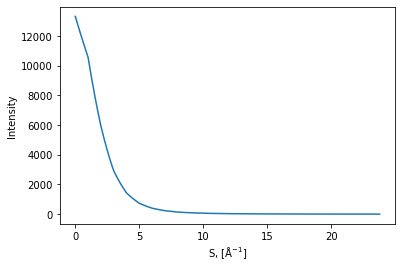

In [44]:
I_atomic_all = np.array(I_atomic_all)
#print(len(I_atomic_all))
I_atomic = sum(I_atomic_all)
#print(len(I_atomic))
#print(I_atomic)

angs = '\u00C5'

plt.figure()
plt.plot(s_new, I_atomic, label = "I atomic")
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel("Intensity")
plt.show()

### Calculate I molecular

In [79]:
U=90000; #Acceleration field in V
E=U*1.6022*1e-19;
m=9.1094e-31;
h=6.6261e-34;
c=299792458; #Physical constants
lam=h/np.sqrt(2*m*E)/np.sqrt(1+E/(2*m*c**2)); #Electron wavelength
k=2*np.pi/lam;

In [85]:
test = get_I_molecular(atoms, x, y, z, n, ds, s0, amps, phase, idx_all)
print(len(test))
test = [i for i in test if len(i) != 0]
print(len(test))
test_sum = sum(np.array(test))
print(len(test))

test_nonan = np.nan_to_num(test_sum)
print(len(test_nonan))
test_real = test_nonan.real
print(len(test_real))
I_mol = test_real
print(len(I_mol))

C:\Users\laure\AppData\Local\Temp\ipykernel_3904\1018650557.py:117: RuntimeWarning: invalid value encountered in double_scalars
  I_m = (amps_new_i[k])*np.conjugate(amps_new_j[k])*(np.sin(s_new[k]*r_ij)/(s_new[k]*r_ij))


225
210
210
1000
1000
998


In [81]:
I_tot = I_mol + I_atomic

<function matplotlib.pyplot.show(block=None)>

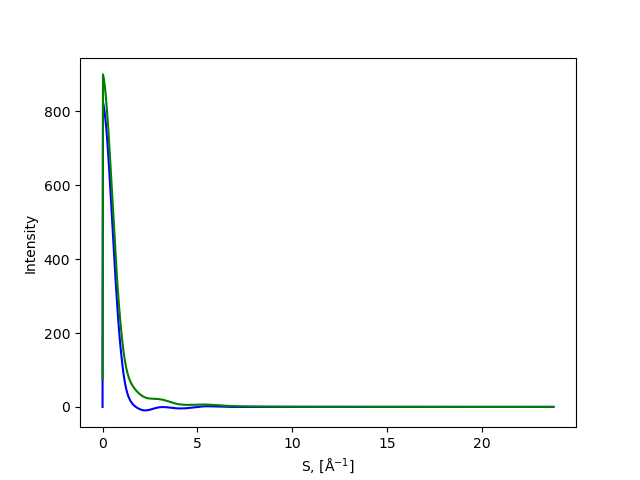

In [86]:
plt.figure()
plt.plot(s_new, I_mol, "b", label = "I molecular")
plt.plot(s_new, I_tot, "g", label="I total")
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel("Intensity")
plt.show

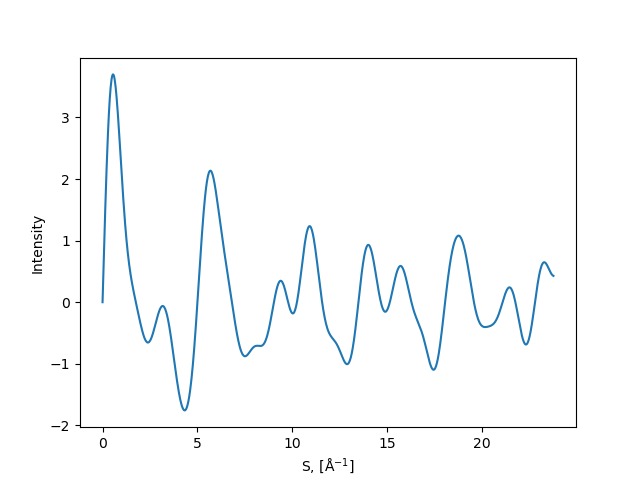

In [95]:
sm = s_new*(I_mol/I_atomic)

plt.figure()
plt.plot(s_new, sm)
plt.xlabel(r'S, ['+angs+'$^{-1}$]')
plt.ylabel("Intensity")
plt.show()

## Fitting Data to Theory

In [ ]:
def fitting_function(xy,xcenter,ycenter,z0,amplitude):
    x = np.ravel(xy[0])
    y = np.ravel(xy[1])
    xcent = x-xcenter
    ycent = y-ycenter
    r_xy = np.sqrt(xcent**2+ycent**2)
    theta = np.arctan(r_xy/z0)
    Q_abs = theta_to_q(theta)
    ff = amplitude*form_factor(Q_abs)
    thomson_correction = 1/get_thomson_correction(xcent,ycent,z0)
    geometry_correction = 1/get_geometry_correction(xcent,ycent,z0)
    ff = ff*thomson_correction*geometry_correction
    return ff

def get_1d_fit(params,fitting_function):
    x0,y0,z0 = params[0],params[1],params[2]
    if len(params<5):
        phi0 = 0
    elif len(params)==5:
        phi0 = params[4]
    thomson_correction = get_thomson_correction(x-x0,y-y0,z0,phi0=phi0)
    PHI = xyz_to_phi(x-x0,y-y0,z0)
    geometry_correction = get_geometry_correction(x-x0,y-y0,z0)
    all_corrections = thomson_correction*geometry_correction
    fit_pattern = np.reshape(fitting_function([x,y],*params),(8,512,1024))*all_corrections
    data_corrected = jungfrau_sum*all_corrections

    QQ_data = xyz_to_q(x-x0,y-y0,z0)
    isotropic_data_1d = []
    isotropic_fit_1d = []
    QQ_1d_data = np.linspace(np.min(QQ_data),np.max(QQ_data),51)
    dQQ_1d_data = np.mean(np.diff(QQ_1d_data))
    QQ_1d_data = QQ_1d_data[:-1]
    residuals = []
    sems = []
    from scipy.stats import sem
    for qval in QQ_1d_data:
        isotropic_data_1d.append(np.mean(data_corrected[(QQ_data>qval)&(QQ_data<qval+dQQ_1d_data)]))
        sems.append(sem(data_corrected[(QQ_data>qval)&(QQ_data<qval+dQQ_1d_data)]))
        isotropic_fit_1d.append(np.mean(fit_pattern[(QQ_data>qval)&(QQ_data<qval+dQQ_1d_data)]))
        residuals.append(np.mean(np.abs((jungfrau_sum-fit_pattern)[(QQ_data>qval)&(QQ_data<qval+dQQ_1d_data)])))
    return QQ_1d_data, isotropic_data_1d, isotropic_fit_1d, fit_pattern